In [34]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#Loading the dataset
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [36]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [37]:
# Data Cleaning

In [38]:
# cleaning whitespace
# Strip white spaces in columns 
#f.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip white spaces in values 
#df = df.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
#df.info()


In [39]:
#checking missing values
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

There are 19456 missing values in the HDI for year column

In [40]:
# Confirming missing values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [41]:
# Feature Engineering
# Suicide proportion
df['suicide_proportion'] = df['suicides_no'] / df['population']
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_proportion
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033


<Axes: title={'center': 'Trend of Suicide Rates Over Years'}, xlabel='year'>

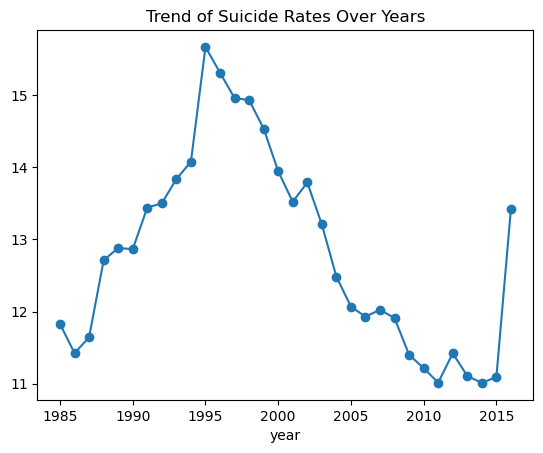

In [42]:
# Year Vs Suicide/100k pop
avg_suicide_rate_by_year = df.groupby('year')['suicides/100k pop'].mean()
avg_suicide_rate_by_year.plot(kind='line', title='Trend of Suicide Rates Over Years', marker='o')


Observations:
- Initial Increase: The suicide rate shows an initial increase from 1985 to the mid-1990s.
- Peak and Decline:  The rate peaks in the mid-1990s (around 1995) and then exhibits a significant decline.
- Fluctuations in Recent Years:  After the decline, the rate seems to stabilize with some fluctuations in the more recent years (2010 onwards).
- Overall Trend: While there was a notable increase and subsequent decrease, the overall trend from the mid-1990s to 2016 suggests a stabilization or slight decline in suicide rates.

In [43]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'suicide_proportion'],
      dtype='object')


Average Suicide Rate by Age Group:
           age  suicides/100k pop
0  15-24 years           8.947154
1  25-34 years          12.186885
2  35-54 years          14.947441
3   5-14 years           0.620041
4  55-74 years          16.155579
5    75+ years          23.955409


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25584\1646303975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_analysis, x='suicides/100k pop', y='age', palette='viridis')


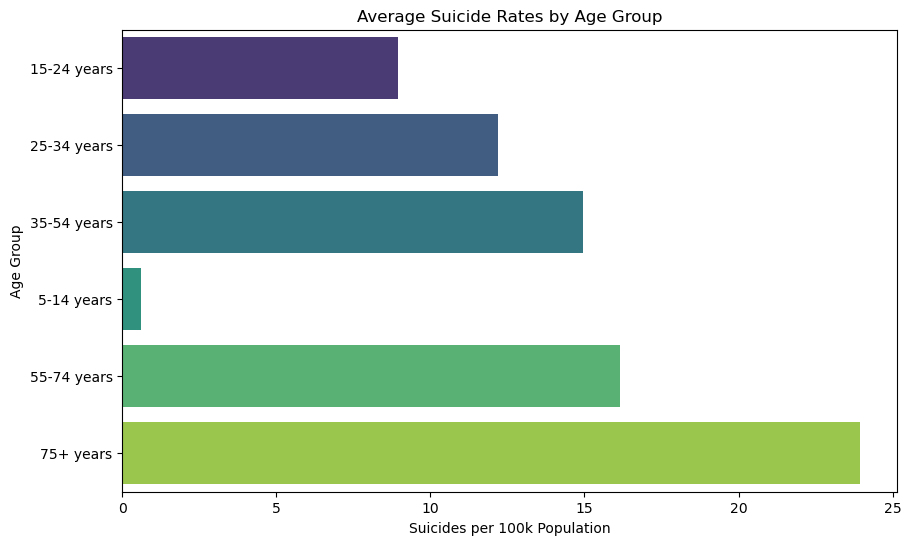

In [44]:
# Group data by age and calculate the average suicide rate
age_analysis = df.groupby('age')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Age Group:")
print(age_analysis)

# Plot suicide rates by age
plt.figure(figsize=(10, 6))
sns.barplot(data=age_analysis, x='suicides/100k pop', y='age', palette='viridis')
plt.title('Average Suicide Rates by Age Group')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Age Group')
plt.show()

Observations:
- Highest Rates in Older Age Groups: The age groups 55-74 years and 75+ years exhibit the highest suicide rates, with the 75+ group showing the absolute highest rate. This indicates a greater vulnerability to suicide in older adults.
- Moderate Rates in Young Adults: The 15-24 and 25-34 year age groups show moderate suicide rates, significantly lower than the oldest age groups but still notable.
- Lower Rate in Middle Age Adults: The 35-54 year age group has a somewhat lower suicide rate compared to the young adult groups.
- Lowest Rate in Youngest Group: The 5-14 year age group exhibits the lowest suicide rate, as indicated by the shortest bar.


Average Suicide Rate by Gender:
      sex  suicides/100k pop
0  female           5.392866
1    male          20.239329


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25584\2418484271.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_analysis, x='sex', y='suicides/100k pop', palette='coolwarm')


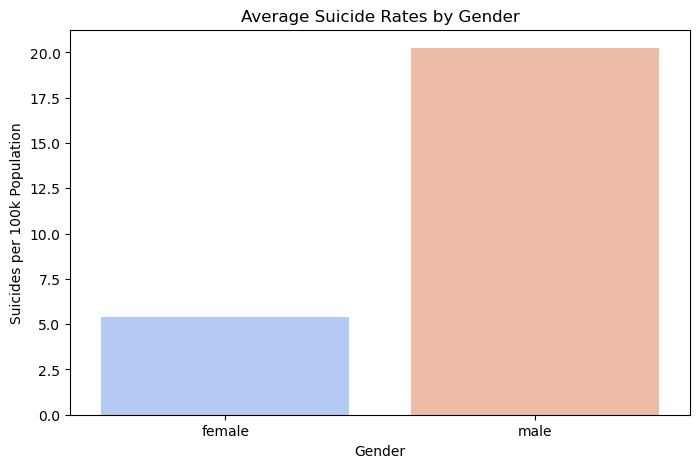

In [45]:
# --------- Objective 2: Gender Analysis ---------

# Group data by gender and calculate the average suicide rate
gender_analysis = df.groupby('sex')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Gender:")
print(gender_analysis)

# Plot suicide rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_analysis, x='sex', y='suicides/100k pop', palette='coolwarm')
plt.title('Average Suicide Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicides per 100k Population')
plt.show()


Average Suicide Rate by Generation:
        generation  suicides/100k pop
0          Boomers          14.742094
1  G.I. Generation          23.946378
2     Generation X          10.556874
3     Generation Z           0.642299
4       Millenials           5.383597
5           Silent          18.418848


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25584\633813854.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=generation_analysis, x='generation', y='suicides/100k pop', palette='mako')


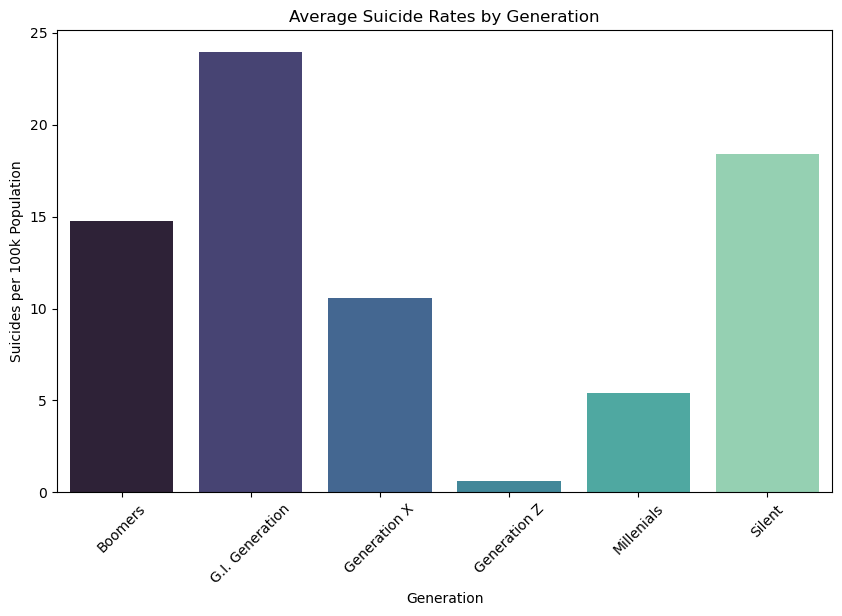

In [46]:
#------- Objective 3: Generation Insights ---------

# Group data by generation and calculate the average suicide rate
generation_analysis = df.groupby('generation')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Generation:")
print(generation_analysis)

# Plot suicide rates by generation
plt.figure(figsize=(10, 6))
sns.barplot(data=generation_analysis, x='generation', y='suicides/100k pop', palette='mako')
plt.title('Average Suicide Rates by Generation')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.show()


Observations:
- Highest Rate in G.I. Generation: The G.I. Generation shows the highest suicide rate among the listed generations.
- High Rates in Boomers and Silent Generation: Boomers and the Silent Generation also exhibit relatively high suicide rates, although lower than the G.I. Generation.
- Moderate Rates in Generation X and Millennials: Generation X and Millennials have moderate suicide rates, falling in the middle range.
- Lowest Rate in Generation Z: Generation Z shows the lowest suicide rate among the listed generations.

Key Insights:
- Generational Differences: The chart clearly demonstrates that suicide rates vary significantly across different generations.
- Older Generations at Higher Risk: Older generations (G.I., Boomers, Silent) show a higher vulnerability to suicide compared to younger generations.
- Generation Z Paradox: While often discussed as a generation facing mental health challenges, Generation Z exhibits the lowest suicide rate in this dataset. This highlights the importance of data-driven insights and avoiding generalizations.


Population vs Suicide Rates (Mean per Country):
                  country    population  suicides/100k pop
0                 Albania  2.360813e+05           3.502879
1     Antigua and Barbuda  6.142679e+03           0.552901
2               Argentina  2.784907e+06          10.469328
3                 Armenia  2.595576e+05           3.275872
4                   Aruba  7.498077e+03           9.503095
..                    ...           ...                ...
96   United Arab Emirates  5.069760e+05           1.317917
97         United Kingdom  4.674107e+06           7.502473
98          United States  2.165061e+07          13.819812
99                Uruguay  2.502052e+05          19.461190
100            Uzbekistan  1.842510e+06           8.099129

[101 rows x 3 columns]


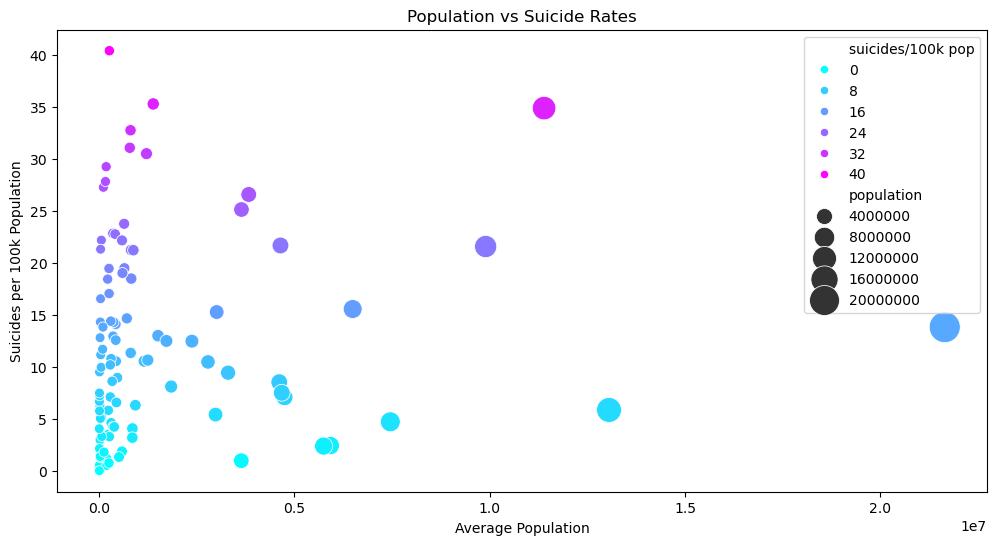

In [47]:
#------- Objective 4: Population-Based Risk ---------

# Analyze the relationship between population size and suicide rate
population_analysis = df.groupby('country')[['population', 'suicides/100k pop']].mean().reset_index()
print("\nPopulation vs Suicide Rates (Mean per Country):")
print(population_analysis)

# Scatter plot: population vs suicide rates
plt.figure(figsize=(12, 6))
sns.scatterplot(data=population_analysis, x='population', y='suicides/100k pop', hue='suicides/100k pop', size='population', sizes=(50, 500), palette='cool')
plt.title('Population vs Suicide Rates')
plt.xlabel('Average Population')
plt.ylabel('Suicides per 100k Population')
plt.show()


Observations:
- No Clear Linear Correlation: There isn't a strong linear relationship between average population and suicide rates. Points are scattered across the plot, rather than forming a clear upward or downward trend.
- Clustering of Smaller Populations:  There's a dense cluster of points in the bottom left corner, indicating that many regions/units have relatively small populations and low suicide rates.
- High Suicide Rates in Small Populations:  Some of the highest suicide rates (dark purple/magenta points) are observed in regions/units with relatively small populations.
- Large Populations Show Wide Range of Suicide Rates:  Regions/units with large populations (larger points) exhibit a wide range of suicide rates, from low to high.


Average Suicide Rates by Age and Gender:
            age     sex  suicides/100k pop
0   15-24 years  female           4.328018
1   15-24 years    male          13.566290
2   25-34 years  female           4.573210
3   25-34 years    male          19.800560
4   35-54 years  female           5.916480
5   35-54 years    male          23.978402
6    5-14 years  female           0.462252
7    5-14 years    male           0.777831
8   55-74 years  female           7.123447
9   55-74 years    male          25.187712
10    75+ years  female           9.919802
11    75+ years    male          37.991017


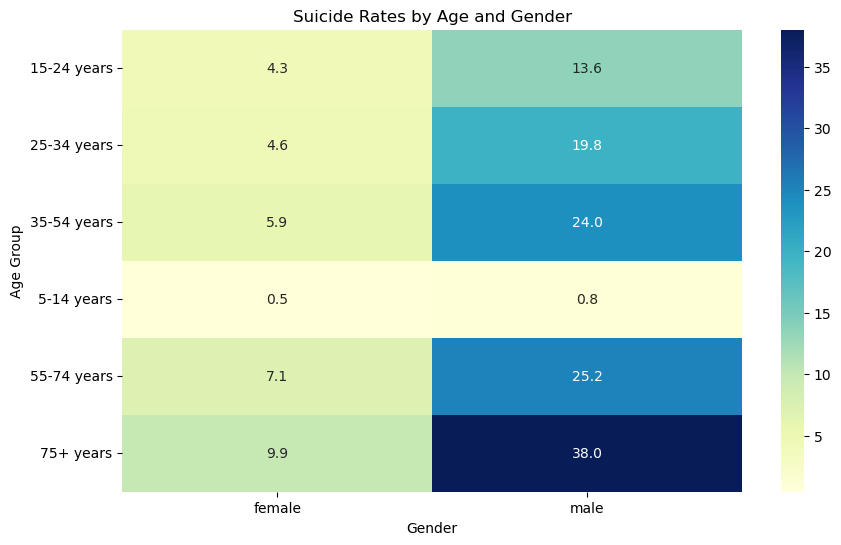

In [48]:
# --------- Cross-Age and Gender Analysis ---------

# Analyze suicide rates across age groups and gender
age_gender_analysis = df.groupby(['age', 'sex'])['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rates by Age and Gender:")
print(age_gender_analysis)

# Heatmap for suicide rates by age and gender
age_gender_pivot = age_gender_analysis.pivot(index='age', columns='sex', values='suicides/100k pop')
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Suicide Rates by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

Observations:
Gender Disparity: The right side of the heatmap (male) is generally darker than the left side (female), indicating a significant gender disparity in suicide rates, with males exhibiting much higher rates across all age groups.
Age Trends:
- Females: Suicide rates for females are relatively low and consistent across most age groups, with a slight increase in the oldest age group (75+ years).
- Males: Suicide rates for males are considerably higher and show a more pronounced age trend. Rates increase with age, peaking in the oldest age group (75+ years).
- Highest Rate in Older Males: The cell with the darkest shade (and highest numerical value, 35.6) corresponds to males aged 75+, highlighting this group as having the highest suicide rate.
- Lowest Rate in Youngest Group: The cell with the lightest shade (and lowest numerical value, 0.5) corresponds to children aged 5-14 years, indicating the lowest suicide rate in this group.

Key Insights:
- Age and Gender as Risk Factors: The heatmap clearly demonstrates both age and gender as significant risk factors for suicide.
- Vulnerable Populations: Older males are identified as a particularly vulnerable population with the highest suicide rate.
- Need for Targeted Interventions: The findings underscore the need for targeted interventions and support systems tailored to specific age and gender groups


Average Suicide Rates by Gender Over Years:
    year     sex  suicides/100k pop
0   1985  female           5.776910
1   1985    male          17.875486
2   1986  female           5.812674
3   1986    male          17.033993
4   1987  female           5.732130
..   ...     ...                ...
59  2014    male          17.564124
60  2015  female           4.653468
61  2015    male          17.534677
62  2016  female           4.818625
63  2016    male          22.023750

[64 rows x 3 columns]


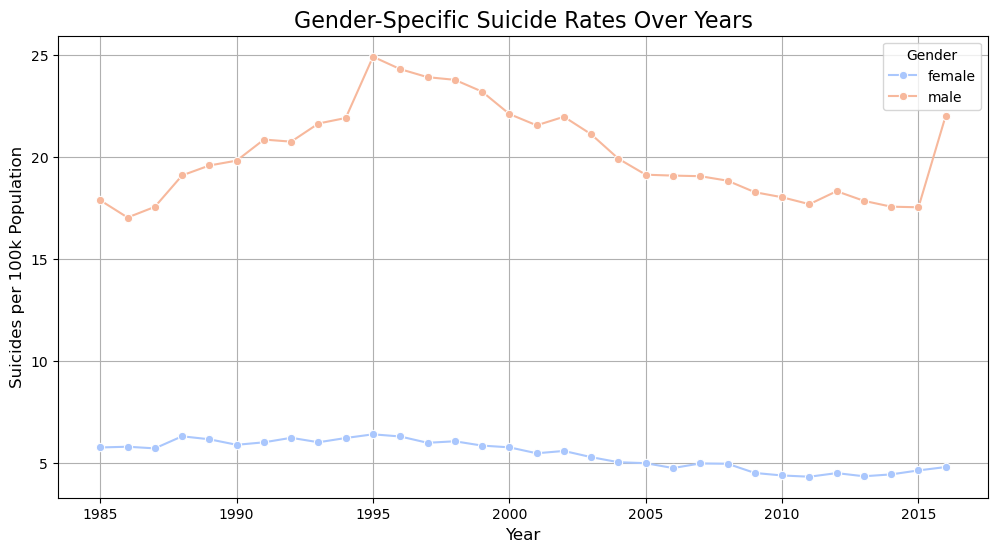

In [49]:


# --------- Gender Analysis of Suicide Rates Over Years ---------

# Group by year and gender, then calculate the average suicide rate per 100k population
gender_year_analysis = df.groupby(['year', 'sex'])['suicides/100k pop'].mean().reset_index()

# Print the results for reference
print("\nAverage Suicide Rates by Gender Over Years:")
print(gender_year_analysis)

# Plot the gender-specific suicide rates over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_year_analysis, x='year', y='suicides/100k pop', hue='sex', marker='o', palette='coolwarm')
plt.title('Gender-Specific Suicide Rates Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicides per 100k Population', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.grid(True)
plt.show()



In the above trend analysis there is a sharp increase in male suicide rate over the year 1985 to 1995 then a drop unlike in females the rise between 1985 to 1995 minimal followed by a steady drop .


Overall Average Suicide Rate (Males): 20.19 per 100k population
Overall Average Suicide Rate (Females): 5.44 per 100k population

Year-wise Male-Female Suicide Rate Gap:
sex   Male-Female Gap
year                 
1985        12.098576
1986        11.221319
1987        11.824167
1988        12.772007
1989        13.404487
1990        13.911901
1991        14.821823
1992        14.497795
1993        15.604897
1994        15.666495
1995        18.485171
1996        17.982100
1997        17.899242
1998        17.694557
1999        17.328534
2000        16.316647
2001        16.054413
2002        16.360891
2003        15.805271
2004        14.855635
2005        14.121687
2006        14.316804
2007        14.062655
2008        13.856549
2009        13.745094
2010        13.619564
2011        13.342054
2012        13.800185
2013        13.483500
2014        13.105321
2015        12.881210
2016        17.205125


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25584\2028791409.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_diff.index, y=gender_diff['Male-Female Gap'], palette='viridis')


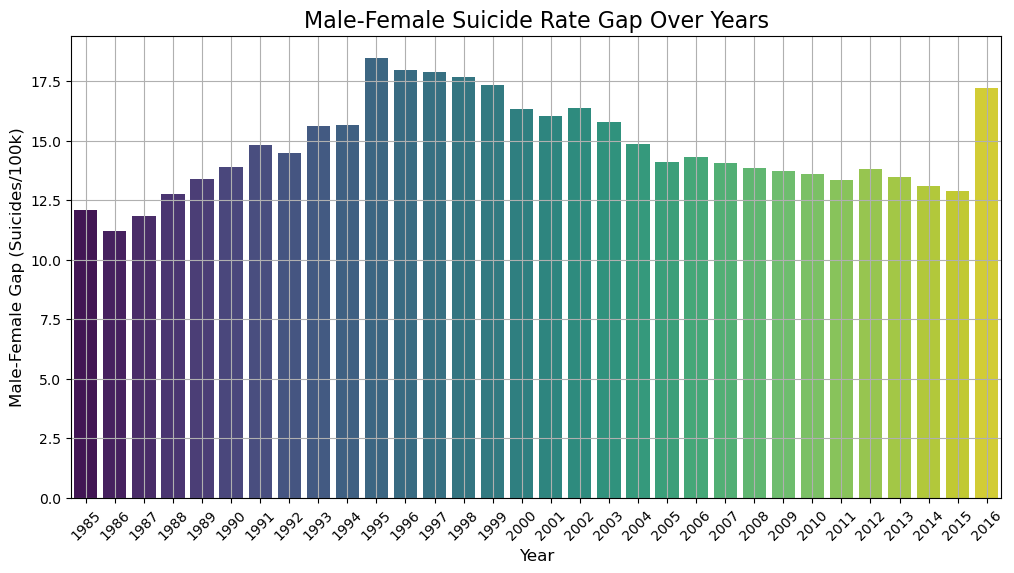

In [50]:
# --------- Gender Suicide Rate Trends ---------

# Calculate trends (e.g., average rate of change for each gender)
male_trend = gender_year_analysis[gender_year_analysis['sex'] == 'male']['suicides/100k pop'].mean()
female_trend = gender_year_analysis[gender_year_analysis['sex'] == 'female']['suicides/100k pop'].mean()

print(f"\nOverall Average Suicide Rate (Males): {male_trend:.2f} per 100k population")
print(f"Overall Average Suicide Rate (Females): {female_trend:.2f} per 100k population")

# Analyze Year-on-Year Difference
gender_diff = gender_year_analysis.pivot(index='year', columns='sex', values='suicides/100k pop')
gender_diff['Male-Female Gap'] = gender_diff['male'] - gender_diff['female']

# Print the gap between male and female suicide rates per year
print("\nYear-wise Male-Female Suicide Rate Gap:")
print(gender_diff[['Male-Female Gap']])

# Plot the male-female gap over years
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_diff.index, y=gender_diff['Male-Female Gap'], palette='viridis')
plt.title('Male-Female Suicide Rate Gap Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Male-Female Gap (Suicides/100k)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Average Suicide Rates by Generation Over Years:
     year       generation  suicides/100k pop
0    1985          Boomers          10.008750
1    1985  G.I. Generation          19.789323
2    1985     Generation X           4.483385
3    1985           Silent          12.403021
4    1986          Boomers          10.593854
..    ...              ...                ...
141  2015           Silent          20.967339
142  2016          Boomers          15.031875
143  2016     Generation X          13.298438
144  2016       Millenials           8.937500
145  2016           Silent          20.900625

[146 rows x 3 columns]


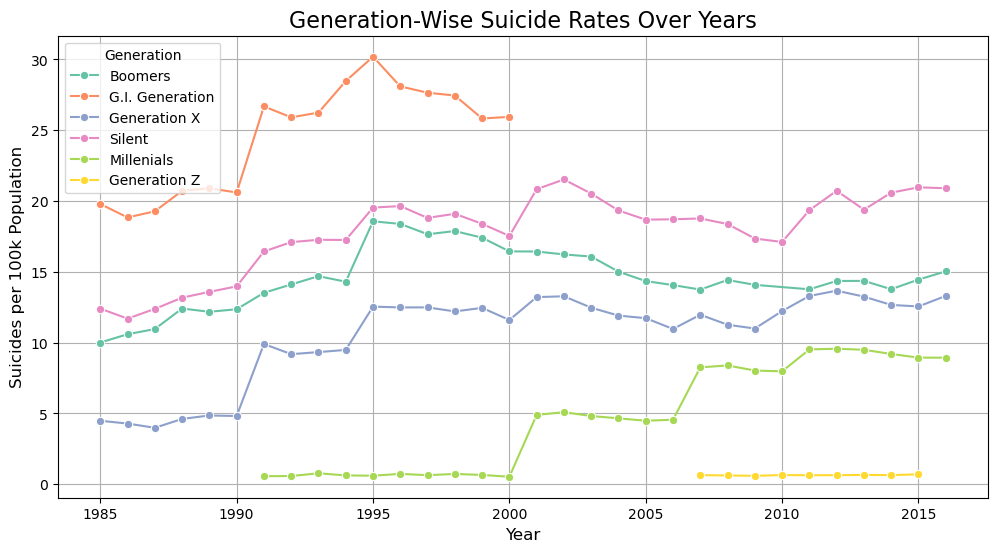

In [51]:

# --------- Generation-Wise Suicide Rate Trends ---------

# Group by year and generation, then calculate the average suicide rate
generation_year_analysis = df.groupby(['year', 'generation'])['suicides/100k pop'].mean().reset_index()

# Print the results for reference
print("\nAverage Suicide Rates by Generation Over Years:")
print(generation_year_analysis)

# Plot the generation-wise suicide rates over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=generation_year_analysis, x='year', y='suicides/100k pop', hue='generation', marker='o', palette='Set2')
plt.title('Generation-Wise Suicide Rates Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicides per 100k Population', fontsize=12)
plt.legend(title='Generation', fontsize=10)
plt.grid(True)
plt.show()




Observations:
- Varying Trends Across Generations: The graph clearly shows that suicide rates have evolved differently for each generation over the given time period.
- G.I. Generation Shows Highest Peak: The G.I. Generation exhibits the highest suicide rate overall and shows a dramatic peak in the mid-1990s. This generation also shows a significant decline after the peak.
- Boomers and Silent Generation Show Similar Trends: Boomers and the Silent Generation show relatively similar patterns, with fluctuations and a general trend of decreasing rates after the mid-1990s.
- Generation X Shows Moderate Fluctuations: Generation X experiences moderate fluctuations in suicide rates, without a clear upward or downward trend.
- Millennials and Generation Z Show More Recent Increases: Millennials and Generation Z show more recent increases in suicide rates, particularly in the later years. However, data for these generations might be incomplete due to their relative youth during the earlier years in the dataset.
- Limited Data for Younger Generations: Data for Millennials and Generation Z starts later in the timeline, as they were younger and likely had fewer members in the population in earlier years.

Key Insights:

- Generational Differences in Suicide Rates: The chart highlights significant differences in suicide rate trends across generations, suggesting that each cohort faces unique risk factors and societal pressures.
- Time Period Effects: The mid-1990s peak observed in some generations suggests that broader societal factors during that time might have contributed to increased suicide rates.
- Emerging Trends in Younger Generations: The recent increase in suicide rates among Millennials and Generation Z raises concerns and warrants further investigation.



Overall Average Suicide Rates by Generation:
        generation  suicides/100k pop
1  G.I. Generation          23.946378
5           Silent          18.418848
0          Boomers          14.742094
2     Generation X          10.556874
4       Millenials           5.383597
3     Generation Z           0.642299


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25584\452500941.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=generation_average, x='suicides/100k pop', y='generation', palette='coolwarm')


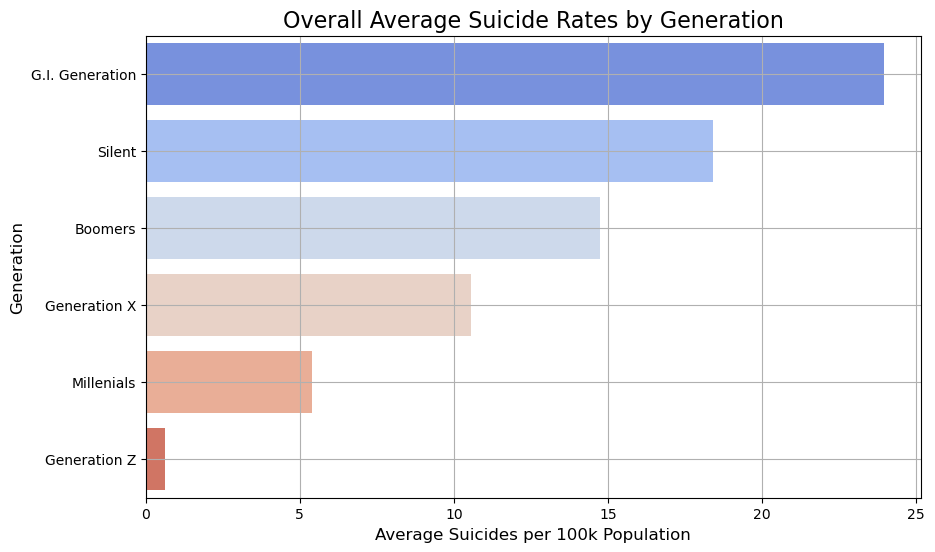

In [52]:
# --------- Generation-Wise Average Suicide Rates ---------

# Calculate the overall average suicide rate for each generation
generation_average = df.groupby('generation')['suicides/100k pop'].mean().reset_index()
generation_average = generation_average.sort_values(by='suicides/100k pop', ascending=False)
print("\nOverall Average Suicide Rates by Generation:")
print(generation_average)

# Plot average suicide rates for each generation
plt.figure(figsize=(10, 6))
sns.barplot(data=generation_average, x='suicides/100k pop', y='generation', palette='coolwarm')
plt.title('Overall Average Suicide Rates by Generation', fontsize=16)
plt.xlabel('Average Suicides per 100k Population', fontsize=12)
plt.ylabel('Generation', fontsize=12)
plt.grid(True)
plt.show()


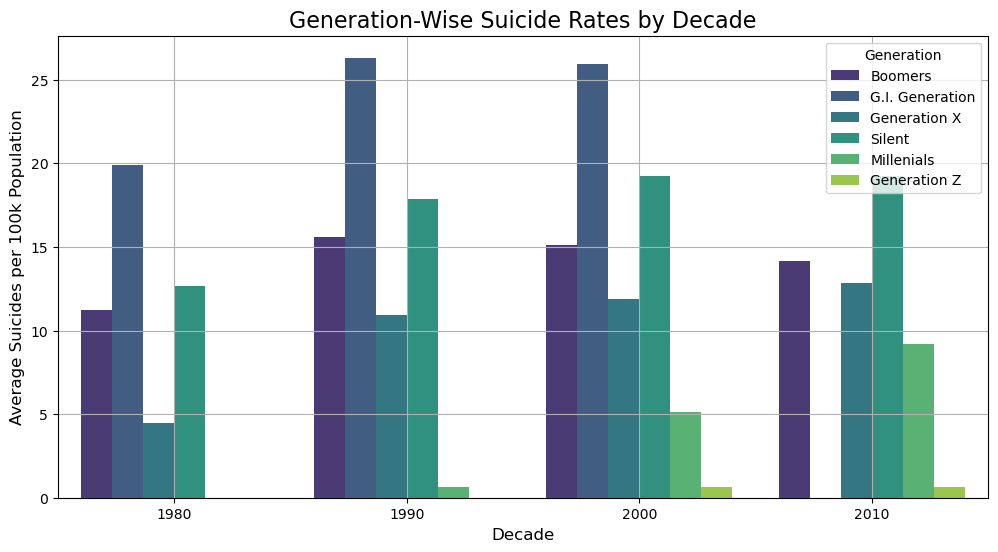

In [53]:
# --------- Additional Insights: Generation Comparison Over Decades ---------

# Filter the dataset to specific decades (e.g., 1980s, 1990s, 2000s, etc.)
df['decade'] = (df['year'] // 10) * 10  # Group years into decades
decade_generation_analysis = df.groupby(['decade', 'generation'])['suicides/100k pop'].mean().reset_index()

# Plot suicide rates by generation for each decade
plt.figure(figsize=(12, 6))
sns.barplot(data=decade_generation_analysis, x='decade', y='suicides/100k pop', hue='generation', palette='viridis')
plt.title('Generation-Wise Suicide Rates by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Suicides per 100k Population', fontsize=12)
plt.legend(title='Generation', fontsize=10)
plt.grid(True)
plt.show()

Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Convert GDP to integer (remove commas)
df["gdp_for_year ($)"] = df["gdp_for_year ($)"].str.replace(",", "").astype(float)

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['country', 'sex', 'age', 'country-year']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Encode the target variable (Generation)
le_generation = LabelEncoder()
df['generation'] = le_generation.fit_transform(df['generation'])


In [ ]:
# Select features and target
X = df.drop(columns=['generation'])
y = df['generation']

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X[['suicides_no', 'population', 'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)', 'decade']] = \
    scaler.fit_transform(X[['suicides_no', 'population', 'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)', 'decade']])


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=le_generation.classes_))